In [1]:
from transformers.utils import logging
logging.set_verbosity_error()

In [2]:
from transformers import CLIPModel

In [3]:
model = CLIPModel.from_pretrained(
    "./models/openai/clip-vit-large-patch14")

In [4]:
from transformers import AutoProcessor

In [5]:
processor = AutoProcessor.from_pretrained(
    "./models/openai/clip-vit-large-patch14")

importador de imagenes desde URL

In [6]:
from PIL import Image

In [7]:
image = Image.open("./trabajo-remoto.jpg")

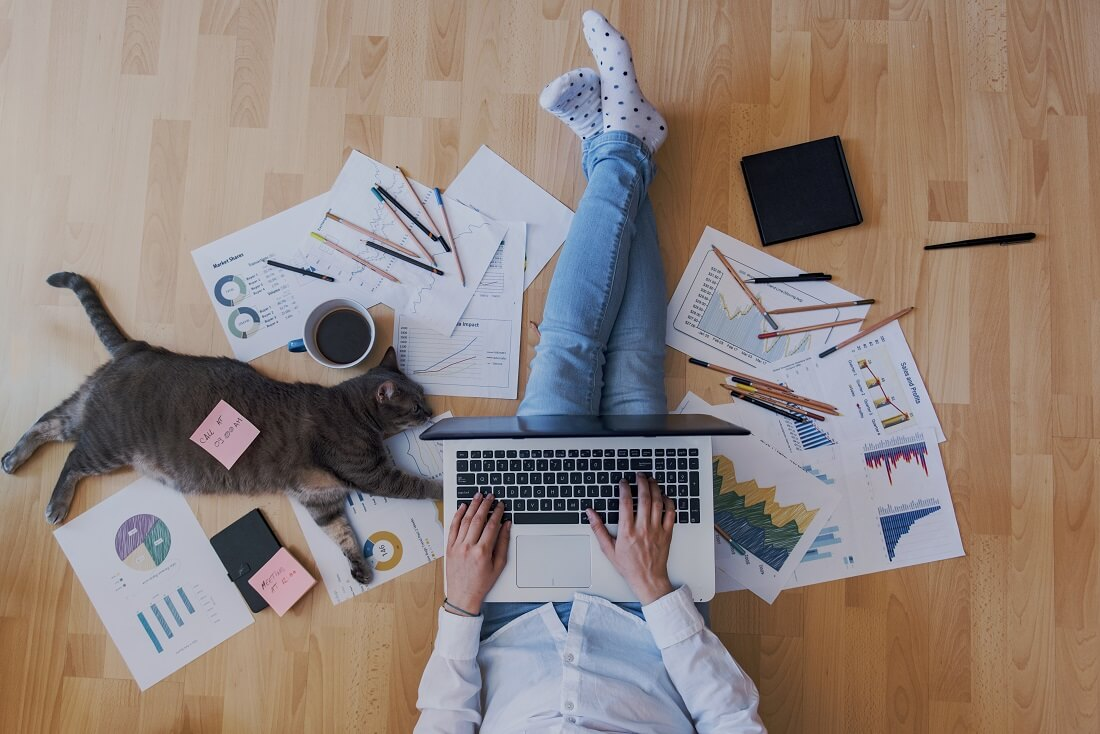

In [8]:
image

- Set the list of labels from which you want the model to classify the image (above).

In [9]:
labels = ["a photo of a cat", "a photo of a dog"]

In [10]:
inputs = processor(text=labels,
                   images=image,
                   return_tensors="pt",
                   padding=True)

In [11]:
outputs = model(**inputs)

In [12]:
outputs

CLIPOutput(loss=None, logits_per_image=tensor([[16.0435, 11.8078]], grad_fn=<TBackward0>), logits_per_text=tensor([[16.0435],
        [11.8078]], grad_fn=<MulBackward0>), text_embeds=tensor([[-0.0031,  0.0028,  0.0291,  ...,  0.0227,  0.0088,  0.0132],
        [ 0.0091, -0.0039,  0.0203,  ...,  0.0310,  0.0025,  0.0109]],
       grad_fn=<DivBackward0>), image_embeds=tensor([[-4.0840e-03,  1.8520e-02,  7.3616e-03, -4.3664e-02,  2.5422e-02,
         -1.2262e-02, -8.4180e-03,  6.6279e-03, -7.2606e-04, -2.4243e-02,
         -1.0763e-02, -9.1101e-03,  6.7349e-03,  3.5900e-02, -9.5680e-03,
          1.3964e-02,  8.4375e-03,  2.3571e-02,  1.7597e-03,  1.9277e-02,
          1.7584e-02, -6.0388e-03, -3.6637e-03, -2.5350e-03, -1.8578e-02,
         -1.5310e-02,  1.8683e-02, -1.9362e-02, -3.1554e-02, -2.6557e-02,
         -8.3941e-03, -1.4490e-03, -2.1774e-02,  3.0632e-03,  9.2883e-03,
          4.0860e-02, -4.5798e-03, -1.8611e-02, -2.5370e-02, -1.6221e-02,
         -7.7989e-03,  4.1993e-02, -1.7

In [13]:
outputs.logits_per_image

tensor([[16.0435, 11.8078]], grad_fn=<TBackward0>)

In [14]:
probs = outputs.logits_per_image.softmax(dim=1)[0]

In [15]:
probs

tensor([0.9857, 0.0143], grad_fn=<SelectBackward0>)

In [16]:
probs = list(probs)
for i in range(len(labels)):
  print(f"label: {labels[i]} - probability of {probs[i].item():.4f}")

label: a photo of a cat - probability of 0.9857
label: a photo of a dog - probability of 0.0143
